In [218]:
#
import numpy as np
import pandas as pd
from PIL import Image
import os
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2 
import math 

In [219]:
categories = ["circle", "square", "star", "triangle"]

In [23]:
im_width = 200
im_height = 200


data = []
target = []

for cat in categories:
    filelist = glob.glob('shapes/' + cat + '/*.png')
    target.extend([cat for _ in filelist])
    data.extend([np.array(Image.open(fname).resize((im_width, im_height))) for fname in filelist])
#
data_array = np.stack(data, axis=0)



In [208]:
X_remains, X, y_remains, y = train_test_split(data_array, np.array(target), test_size=200/len(target))

In [210]:
X.shape

(200, 200, 200)

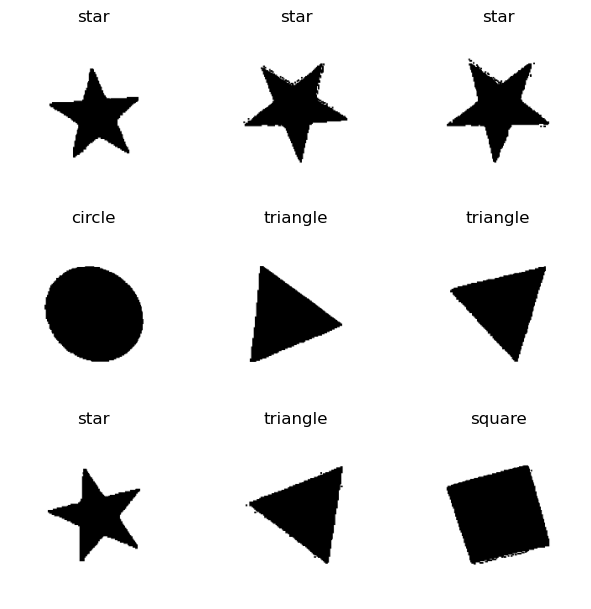

In [211]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(4, 4)
#
for line in range(0, 3):
    for row in range(0, 3):
        num_image = random.randint(0, X.shape[0])
        ax = fig.add_subplot(gs[line, row])
        ax.axis('off');
        ax.set_title(y[num_image])
        ax.imshow(X[num_image]);

In [152]:
def huInv(images,li):
    for img in images:
        moments = cv2.moments(img)
        huMoments = cv2.HuMoments(moments)
        for i in range(0,7):
            huMoments[i] = -1* math.copysign(1.0, huMoments[i]) * math.log10(abs(huMoments[i]))
        li.append(huMoments.tolist())
    
        

In [214]:
huMoments=[]
huInv(X,huMoments)

In [216]:
dict={'shape': y, 'hu0':[moment[0][0] for moment in huMoments], 'hu1':[moment[1][0] for moment in huMoments], 
                       'hu2':[moment[2][0] for moment in huMoments], 'hu3':[moment[3][0] for moment in huMoments],
                       'hu4':[moment[4][0] for moment in huMoments], 'hu5':[moment[5][0] for moment in huMoments], 
                       'hu6':[moment[6][0] for moment in huMoments]}

data=pd.DataFrame(dict)
data.head()

,shape,hu0,hu1,hu2,hu3,hu4,hu5,hu6
0,square,3.016751,11.719048,15.810523,14.150602,-29.265938,-20.024137,-29.298652
1,circle,2.997339,10.972353,16.527431,14.367898,-30.110733,-19.891947,-29.880021
2,square,3.016637,12.505352,16.238600,13.596789,-28.781092,19.921980,28.589756
3,star,3.096309,12.125530,16.861973,13.333522,-28.452549,-19.436412,-28.946209
4,square,2.987964,13.051337,16.004576,14.611904,30.807374,-21.149668,-29.923825


In [217]:
data.to_csv('data.csv',index = False)
data.to_csv('data.csv',index = False)